In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
X,y=make_regression(n_samples=100, n_features=1, noise=20)

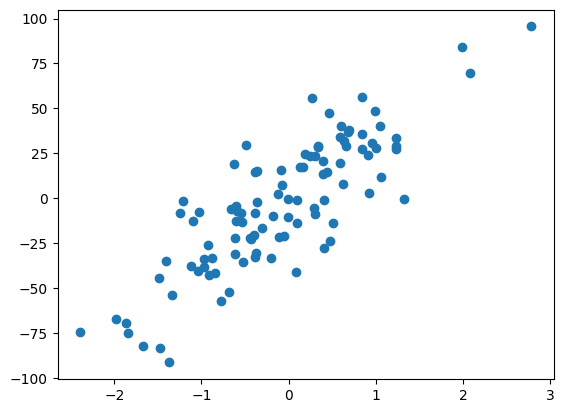

In [3]:
plt.scatter(X,y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Simple Linear Regression

In [5]:
regr=linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

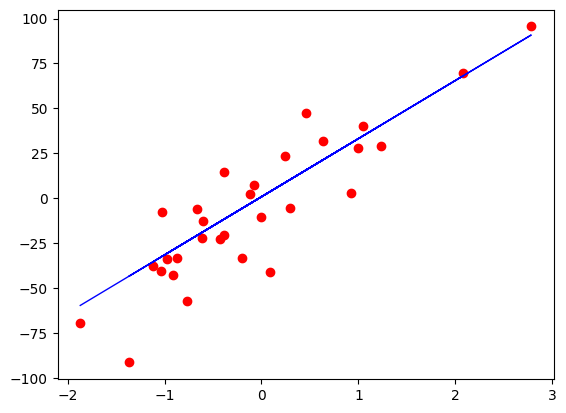

In [6]:
#plt.scatter(X_train, y_train, color='black')
plt.scatter(X_test, y_test, color='red')
#plt.scatter(X_test, regr.predict(X_test), color='blue')
plt.plot(X_test, regr.predict(X_test),color='blue',linewidth=1)
plt.show()

In [7]:
w_0=regr.intercept_
w_1=regr.coef_

In [8]:
print("Intercept: ",w_0)
print("Cofficient: ",w_1)

Intercept:  0.8019060882150626
Cofficient:  [32.36748181]


In [9]:
regr.score(X_train,y_train)

0.6653821843034814

In [10]:
regr.score(X_test,y_test)

0.7691804253990636

## Gradient Decent

In [11]:
#Parameters
alpha=0.001 #learning rate
repeats=1000

#Initializing variables
w0=0
w1=0
errors=[]
points=[]

In [12]:
for j in range(repeats):
    error_sum=0
    squared_error_sum=0
    error_sum_x=0
    for i in range(len(X_train)):
        predict=w0+(X_train[i]*w1)
        squared_error_sum=squared_error_sum+(y_train[i]-predict)**2
        error_sum=error_sum+y_train[i]-predict
        error_sum_x=error_sum_x+(y_train[i]-predict)*X_train[i]
    w0=w0+(alpha*error_sum)
    w1=w1+(alpha*error_sum_x)
    errors.append(squared_error_sum/len(X_train))

print('w0: %2f' %w0)
print('w1: %2f' %w1)

w0: 0.801906
w1: 32.367482


C:\Users\User\AppData\Local\Temp\ipykernel_28780\1263244006.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('w0: %2f' %w0)
C:\Users\User\AppData\Local\Temp\ipykernel_28780\1263244006.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('w1: %2f' %w1)


In [13]:
predicts=[]
mean_error=0
for i in range(len(X_test)):
    predict=w0+(X_test[i]*w1)
    predicts.append(predict)

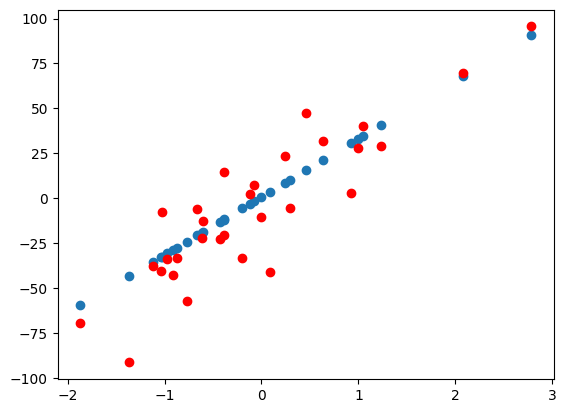

In [14]:
plt.scatter(X_test,predicts)
plt.scatter(X_test, y_test, color='red')
plt.show()

## Polynomial Regression

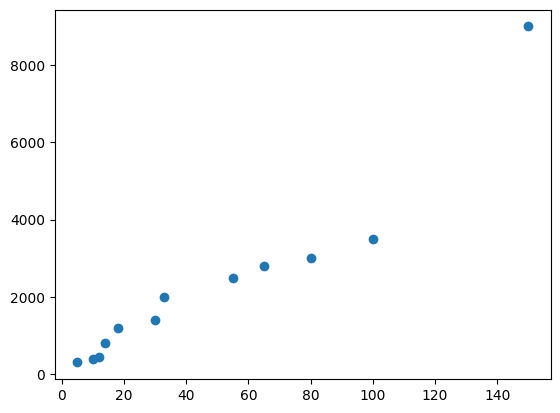

In [15]:
size=[5,10,12,14,18,30,33,55,65,80,100,150]
price=[300,400,450,800,1200,1400,2000,2500,2800,3000,3500,9000]
plt.scatter(size,price)
plt.show()

In [16]:
series_dict={'X':size,'y':price}
df=pd.DataFrame(series_dict)
X=df[['X']]
y=df[['y']]

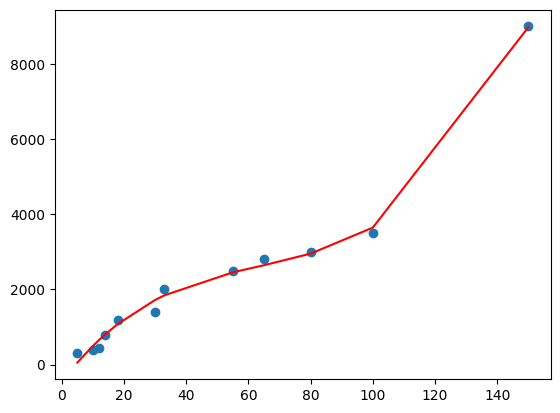

In [17]:
model=make_pipeline(PolynomialFeatures(3),linear_model.LinearRegression())
model.fit(X,y)

plt.scatter(X,y)
plt.plot(X,model.predict(X),color='red')

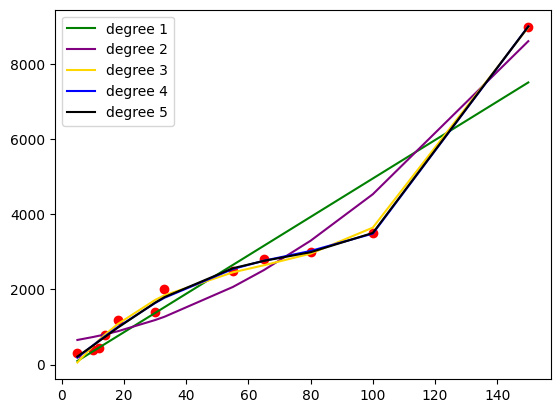

In [18]:
scores=[]
colors=['green','purple','gold','blue','black']
plt.scatter(X,y,c='red')
for count,degree in enumerate([1,2,3,4,5]):
    model=make_pipeline(PolynomialFeatures(degree),linear_model.LinearRegression())
    model.fit(X,y)
    scores.append(model.score(X,y))
    plt.plot(X,model.predict(X),color=colors[count],label='degree %d' %degree)

plt.legend(loc=2)
plt.show()

In [19]:
scores

[0.9059983910519219,
 0.9585314218103534,
 0.9951555665160685,
 0.9966093112780661,
 0.9966678106695267]

## Multivariable Regression

In [20]:
X,y=make_regression(n_samples=100, n_features=5, noise=20)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
regr=linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [23]:
regr.intercept_

np.float64(-0.316777203820358)

In [24]:
regr.coef_

array([75.76021781, 91.42918303, 37.05011598, 93.32207431, 13.67329949])

In [25]:
regr.score(X_train,y_train)

0.9897213935392294

In [26]:
regr.score(X_test,y_test)

0.9675647708148641

In [27]:
size=[5,10,12,14,18,30,33,55,65,80,100,150]
distance=[50,20,70,100,200,150,30,50,70,35,40,20]
price=[300,400,450,800,1200,1400,2000,2500,2800,3000,3500,9000]

In [28]:
series_dict={'X1':size,'X2':distance,'y':price}
df=pd.DataFrame(series_dict)
X=df[['X1','X2']]
y=df[['y']]

In [29]:
regr=linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [30]:
regr.score(X,y)

0.9071864679091037

In [31]:
regr.intercept_

array([-309.68167455])

In [32]:
regr.coef_

array([[51.94345057,  1.62218727]])

## To Avoid Overfitting
### 1. Lasso Regression
### 2. Ridge Regression

In [33]:
X,y=make_regression(n_samples=1000, n_features=10, noise=10)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [35]:
regr=linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [36]:
print('Training Score: ',regr.score(X_train,y_train))
print('Testing Score: ',regr.score(X_test,y_test))

Training Score:  0.9965205619179553
Testing Score:  0.9964065070076057


In [37]:
clf_lasso=linear_model.Lasso(alpha=0.5)
clf_lasso.fit(X_train,y_train)

Lasso(alpha=0.5)

In [38]:
print('Training Score: ',clf_lasso.score(X_train,y_train))
print('Testing Score: ',clf_lasso.score(X_test,y_test))

Training Score:  0.9964263316151881
Testing Score:  0.9963143694274156


In [39]:
clf_ridge=linear_model.Ridge(alpha=10)
clf_ridge.fit(X_train,y_train)

Ridge(alpha=10)

In [40]:
print('Training Score: ',clf_ridge.score(X_train,y_train))
print('Testing Score: ',clf_ridge.score(X_test,y_test))

Training Score:  0.9963145337742116
Testing Score:  0.9961715999058026


In [41]:
model=make_pipeline(PolynomialFeatures(4),linear_model.Ridge())
model.fit(X,y)
model.score(X,y)

0.9997788580883037